#About this dataset:


 ##This data set contains 13 clinicopathologic features aiming to predict recurrence of well differentiated thyroid cancer. The data set was collected in duration of 15 years and each patient was followed for at least 10 years.

##Dataset Characteristics
Tabular

##Subject Area
Biology

##Associated Tasks
Classification

##Feature Type
Real, Categorical, Integer

## Instance
383

# Features
16



## The main objective of this analysis is to predict the recurace of thyroid cancer in patients

## in this section, I checked for missing datas and encoded the categorical data

In [108]:
from ast import increment_lineno
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support,accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [76]:
data= pd.read_csv("/content/drive/MyDrive/Thyroid_Diff.csv")
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [78]:
object_types = data.select_dtypes(include=['object']).columns
object_types

Index(['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [79]:
for i in object_types:
  print(i)
  print(data[i].value_counts())
  print("")

Gender
F    312
M     71
Name: Gender, dtype: int64

Smoking
No     334
Yes     49
Name: Smoking, dtype: int64

Hx Smoking
No     355
Yes     28
Name: Hx Smoking, dtype: int64

Hx Radiothreapy
No     376
Yes      7
Name: Hx Radiothreapy, dtype: int64

Thyroid Function
Euthyroid                      332
Clinical Hyperthyroidism        20
Subclinical Hypothyroidism      14
Clinical Hypothyroidism         12
Subclinical Hyperthyroidism      5
Name: Thyroid Function, dtype: int64

Physical Examination
Multinodular goiter            140
Single nodular goiter-right    140
Single nodular goiter-left      89
Normal                           7
Diffuse goiter                   7
Name: Physical Examination, dtype: int64

Adenopathy
No           277
Right         48
Bilateral     32
Left          17
Extensive      7
Posterior      2
Name: Adenopathy, dtype: int64

Pathology
Papillary         287
Micropapillary     48
Follicular         28
Hurthel cell       20
Name: Pathology, dtype: int64

Focali

In [80]:
le = LabelEncoder()
oe = OrdinalEncoder()
for i in object_types:
  if len(data[i].value_counts())<=3 :
      data[i]= le.fit_transform(data[i])
  else:
    pass



In [81]:
data['Stage'] = le.fit_transform(data['Stage'])
data['T'] = le.fit_transform(data['T'])
data['N'] = le.fit_transform(data['N'])
data['Risk'].replace({2:0,0:2},inplace=True)


In [82]:
data = pd.get_dummies(data, drop_first=True)

In [83]:
#data = pd.get_dummies(data,drop_first=True)
data.shape

(383, 31)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 31 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   Age                                               383 non-null    int64
 1   Gender                                            383 non-null    int64
 2   Smoking                                           383 non-null    int64
 3   Hx Smoking                                        383 non-null    int64
 4   Hx Radiothreapy                                   383 non-null    int64
 5   Focality                                          383 non-null    int64
 6   Risk                                              383 non-null    int64
 7   T                                                 383 non-null    int64
 8   N                                                 383 non-null    int64
 9   M                                          

In [85]:
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Focality,Risk,T,N,M,...,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,27,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,34,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2,30,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
3,62,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,62,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [86]:
y.value_counts()

0    275
1    108
Name: Recurred, dtype: int64

In [87]:
data.describe()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Focality,Risk,T,N,M,...,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,...,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,40.866841,0.185379,0.127937,0.073107,0.018277,0.644909,0.433420,2.206266,0.543081,0.046997,...,0.044386,0.723238,0.005222,0.125326,0.052219,0.125326,0.749347,0.543081,0.159269,0.237598
std,15.134494,0.389113,0.334457,0.260653,0.134126,0.479167,0.643233,1.344667,0.857732,0.211910,...,0.206221,0.447983,0.072168,0.331522,0.222760,0.331522,0.433956,0.498792,0.366405,0.426168
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,82.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,6.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
X=data.drop('Recurred',axis=1)
y= data['Recurred']

In [89]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)

##logistic Regression

In [94]:
l2 = LogisticRegressionCV(penalty='l2',solver='liblinear',Cs=10,cv=4)
l2.fit(X_train,y_train)

LogisticRegressionCV(cv=4, solver='liblinear')

In [95]:
y_pred = l2.predict(X_test)
report = {}
precision,recall,fscore,_ = precision_recall_fscore_support(y_test,y_pred,average='weighted')
report['precision']= precision
report['recall']= recall
report['f1score']= fscore
report

{'precision': 0.9668165917041479,
 'recall': 0.9652173913043478,
 'f1score': 0.964467178175618}

In [103]:
 coeff = l2.coef_[0]
 coefdf = pd.DataFrame({'features':X_train.columns,'coeff':coeff})
 coefdf['abs']= coefdf['coeff'].abs()
 coefdf.sort_values(by='abs',ascending=False)
 coefdf.drop('abs',axis=1,inplace=True)


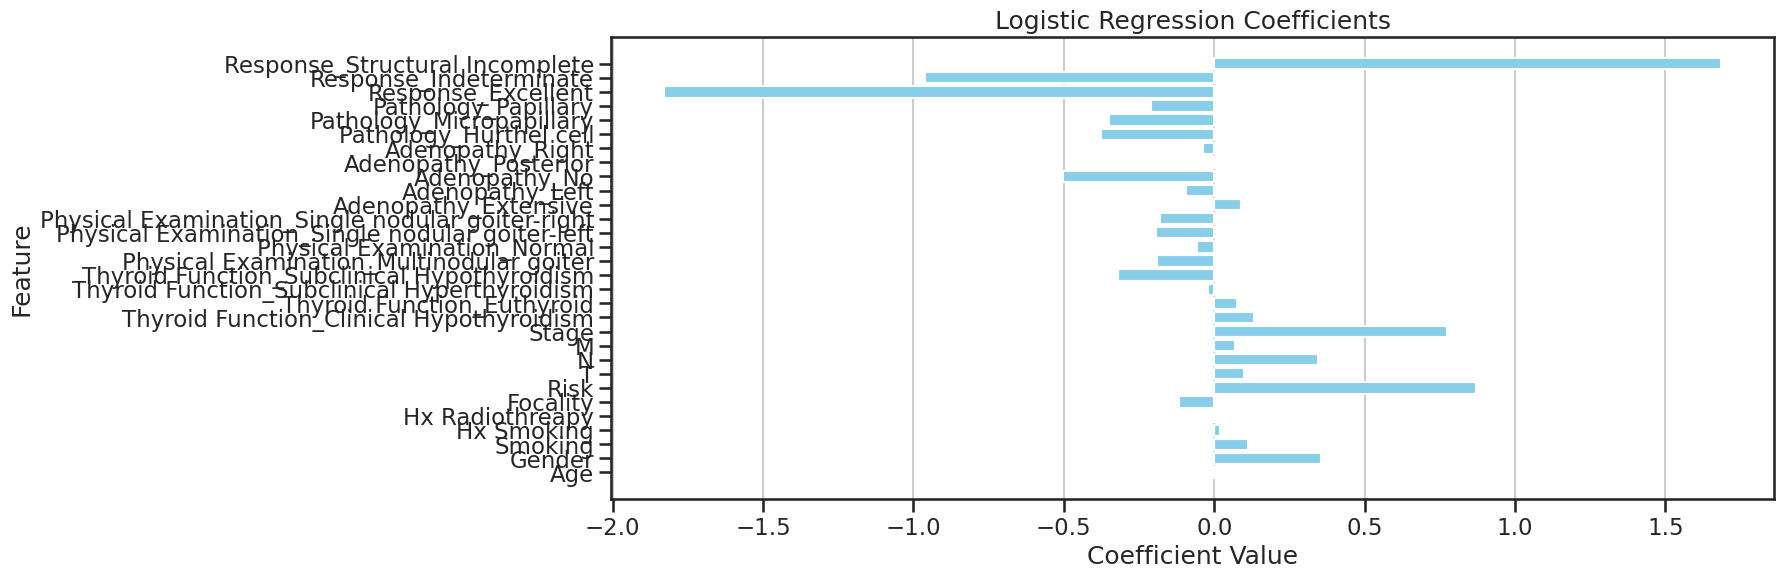

In [107]:
plt.figure(figsize=(15, 6))
plt.barh(coefdf['features'], coefdf['coeff'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.grid(axis='x')
plt.show()

<Axes: >

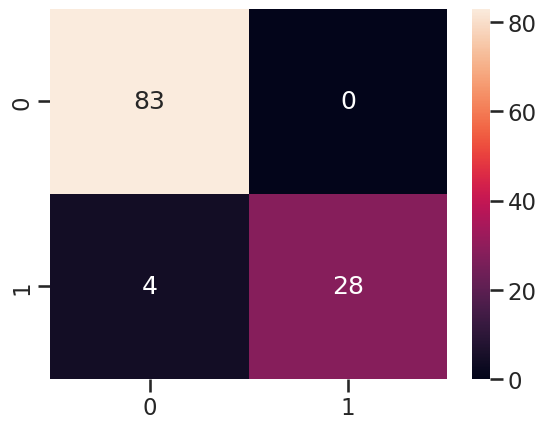

In [92]:
cm =confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

## KNN

In [142]:
sc = StandardScaler()
xs_train = sc.fit_transform(X_train)
xs_test = sc.transform(X_test)

In [143]:
km= KNeighborsClassifier(n_neighbors=3, weights='distance')
km.fit(xs_train,y_train)
y_pred = km.predict(xs_test)

In [144]:
knnr = {}
precision,recall,fscore,_=precision_recall_fscore_support(y_test,y_pred, average='weighted')
knnr['precision']= precision
knnr['recall']= recall
knnr['f1score'] = fscore
knnr

{'precision': 0.9668165917041479,
 'recall': 0.9652173913043478,
 'f1score': 0.964467178175618}

<Axes: >

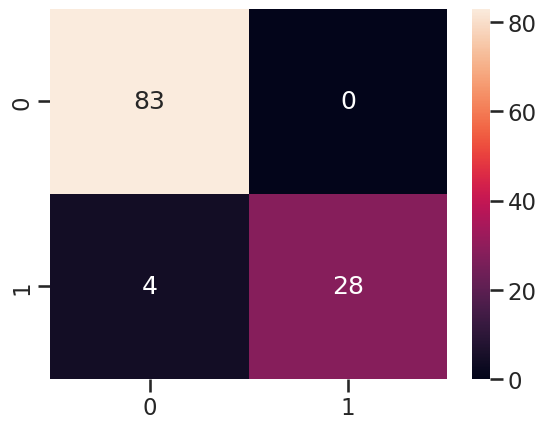

In [145]:
cmk = confusion_matrix(y_test,y_pred)
sns.heatmap(cmk,annot=True)

In [113]:
param_grid = {
    'C':[1 ,10,100],
    'kernel':['rbf','poly','sigmond']
}
model= SVC()

In [114]:
search = GridSearchCV(model,cv=5,scoring='f1',param_grid=param_grid)
search.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100],
                         'kernel': ['rbf', 'poly', 'sigmond']},
             scoring='f1')

In [115]:
search.best_params_

{'C': 100, 'kernel': 'rbf'}

In [116]:
sm = SVC(C=100,kernel='rbf')
sm.fit(X_train,y_train)

SVC(C=100)

In [125]:
ysm_pred= sm.predict(X_test)
def score(ytest,ypred,name):
  name={}
  precision,recall,fscore,_= precision_recall_fscore_support(ytest,ypred,average='weighted')
  name['precision']=precision
  name['recall']=recall
  name['f1score']= fscore
  name['accuracy']= accuracy_score(ytest,ypred)
  return name

In [127]:
score(y_test,ysm_pred,'smscore')

{'precision': 0.9668165917041479,
 'recall': 0.9652173913043478,
 'f1score': 0.964467178175618,
 'accuracy': 0.9652173913043478}

In [128]:
def con(ytest,ypred):
   cm = confusion_matrix(ytest,ypred)
   hm = sns.heatmap(cm,annot=True)
   return hm

<Axes: >

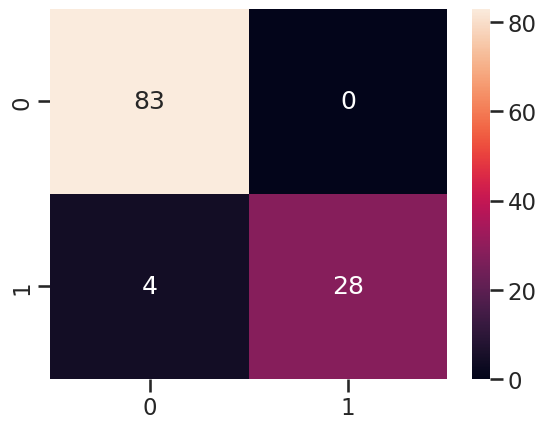

In [129]:
con(y_test,y_pred)

## TREES

In [131]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(warm_start=True,
                       oob_score=True,
                       bootstrap=True,
                       random_state=42)
rf.fit(X_train,y_train)
yrf_pred = rf.predict(X_test)


In [133]:
score(y_test,yrf_pred,'dds')

{'precision': 0.9668165917041479,
 'recall': 0.9652173913043478,
 'f1score': 0.964467178175618,
 'accuracy': 0.9652173913043478}

<Axes: >

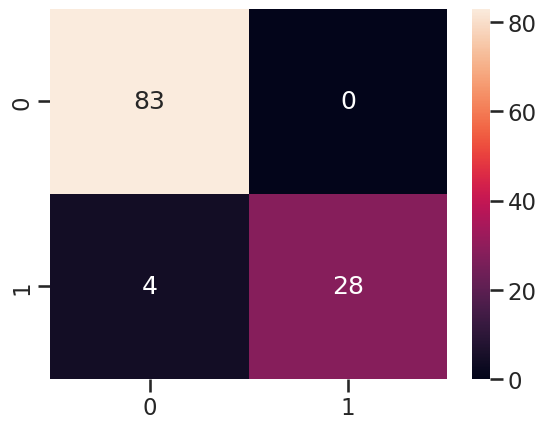

In [134]:
con(y_test,yrf_pred)

## After going through three different models,i came  to the same prediction as the base model so, i will be using my base model(logistic regression) as my main model

## * I discovered that in cases where the "response" greatly affect the predection of the model where structural incomplete  response has the highest  positive impact on the model while  excelent response have the highest negative impact on the model
## * during my time using the KNN model, i discovered that my model performed significantly better after being scaled

## while the models have a decent enough performance, i would like to revisit this with more data and features